**Catégorisez automatiquement des questions**  
Ce projet a pour but de dévolopper un algorithme de machine learning pour assigner automatiquement des tags pertinents à des question possées par de nouveaux utilisateurs de la plateforme stackoverflow

### **1.&nbsp;Description du dataset**
Les données sont mises à disposition par Stackoverflow via cet outil d'export [StackExchange Data Explorer](https://data.stackexchange.com/stackoverflow/query/new).  
Vue le volume assez important de données, nous avons décidé de ne récupérer que les posts ayant au minimum 1 réponse, 5 commentaires, 10 vues et un score de 5.



```
SELECT Title, Body, Tags, Id, Score, ViewCount, CommentCount, CreationDate, FavoriteCount, AnswerCount
FROM Posts 
WHERE ViewCount > 10 AND Score > 5 AND AnswerCount > 0 AND CommentCount > 5
```



### **2.&nbsp;Chargement des données**

In [ ]:
from google.colab import drive
#drive.mount("/gdrive", force_remount=True)
#drive.flush_and_unmount()
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Datasets
%ls

Mounted at /gdrive
/gdrive/MyDrive/Datasets
2016_Building_Energy_Benchmarking.csv  olist_order_reviews_dataset.csv
clean-data.csv                         olist_orders_dataset.csv
fr.openfoodfacts.org.products.csv      olist_products_dataset.csv
house.csv                              olist-rfm.csv
logit_nlp_model.pkl                    olist_sellers_dataset.csv
multilabel_binarizer.pkl               product_category_name_translation.csv
olist_customers_dataset.csv            sea-clean-data.csv
olist-customers-segmentation.csv       stackoverflow-clean-data.csv
olist_geolocation_dataset.csv          stackoverflow.csv
olist_order_items_dataset.csv          tfidf_vectorizer.pkl
olist_order_payments_dataset.csv


In [ ]:
# Install package
!pip install pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8
!pip install beautifulsoup4
!pip install langdetect
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 2.6 MB/s eta 0:00:00
Looking in indexes: https://test.pypi.org/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=99abdda1082f7ae666d664ce8b58e163e07f82659d984950ca697363a18c834a
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m spacy download en_core_web_lg

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-04-04 21:32:19.443806: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 21:32:20.533874: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-04 21:32:22.320132: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the packag

In [ ]:
!python -m spacy download en

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-04-04 21:32:53.854054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 21:32:57.719803: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-04 21:33:01.436657: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install pandarallel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 4.8 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.4-py3-none-any.whl size=16677 sha256=d252c397a87097d891305a234a0dec28ecdb191efa6d7dd5690c56e681b729ed
  Stored in directory: /root/.cache/pip/wheels/41/01/29/deaa71fe596f8d857e57c4fb388db8861e23e6ed0b03204dcb
Successfully built pandarallel


In [ ]:
# Librairies import
import os
import time
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
from pandarallel import pandarallel
from bs4 import BeautifulSoup
from langdetect import detect
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import KBinsDiscretizer

# Library for PEP8 standard
from nbpep8.nbpep8 import pep8

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
pandarallel.initialize(progress_bar=True,
                       nb_workers=6)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
nltk.download('popular')

<ipython-input-8-b978d76ececc>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugu

True

In [ ]:
data = pd.read_csv('stackoverflow.csv', sep=',', low_memory=False)

In [ ]:
data.head()

,Title,Body,Tags,Id,Score,CommentCount,CreationDate,ViewCount,FavoriteCount,AnswerCount
0,Masonry & LazyLoad doesn't want to work together,<p>I am setting up a site for a photographer. ...,<javascript><jquery><css><jquery-masonry><jque...,21434218,13,6,2014-01-29 14:37:19,9485,0.0,4
1,Force a compile time error if std::move will r...,"<p>In his GoingNative 2013 talk, Scott Meyers ...",<c++><c++11><move-semantics>,18646874,23,6,2013-09-05 22:21:32,2165,0.0,3
2,IDE for Swing applications development,<p>Is there any IDE that simplifies creating S...,<java><swing><ide>,26458,47,6,2008-08-25 17:27:19,33238,0.0,31
3,Scipy - Sparse Library ImportError: DLL load f...,<p>I have recently been moving my programming ...,<python><scipy><x86-64><importerror>,18647298,8,6,2013-09-05 23:02:07,10764,0.0,1
4,C++ Memory management,<p>I've learned in College that you always hav...,<c++><memory><pointers>,27492,8,6,2008-08-26 06:50:32,6587,0.0,8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          50000 non-null  object 
 1   Body           50000 non-null  object 
 2   Tags           50000 non-null  object 
 3   Id             50000 non-null  int64  
 4   Score          50000 non-null  int64  
 5   CommentCount   50000 non-null  int64  
 6   CreationDate   50000 non-null  object 
 7   ViewCount      50000 non-null  int64  
 8   FavoriteCount  43018 non-null  float64
 9   AnswerCount    50000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 3.8+ MB


In [ ]:
data.Tags.nunique()

39425

On peut voir que la variable CreationDate n'est pas au bon format et que seule la variable FavoriteCount a des valuers manquantes

### **3.&nbsp;Nettoyage et exploration des données**

In [ ]:
# Convertir CreationDate en datetime format
data['CreationDate'] = pd.to_datetime(data['CreationDate'])

In [ ]:
data['FavoriteCount'].mode()

0    0.0
Name: FavoriteCount, dtype: float64

In [ ]:
# Completer les valeurs manquantes par le mode
data['FavoriteCount'] = data['FavoriteCount'].fillna(data['FavoriteCount'].mode()[0])

Vérifier le mode

In [ ]:
data['FavoriteCount'] = data['FavoriteCount'].astype(int)

In [ ]:
data.Id.nunique()

50000

La variable Id ne compte que des valeurs uniques, nous pouvons donc l'utiliser en index :

In [ ]:
data.set_index('Id', inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 21434218 to 11117950
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Title          50000 non-null  object        
 1   Body           50000 non-null  object        
 2   Tags           50000 non-null  object        
 3   Score          50000 non-null  int64         
 4   CommentCount   50000 non-null  int64         
 5   CreationDate   50000 non-null  datetime64[ns]
 6   ViewCount      50000 non-null  int64         
 7   FavoriteCount  50000 non-null  int64         
 8   AnswerCount    50000 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 3.8+ MB


In [ ]:
data.CreationDate.min()

Timestamp('2008-07-31 21:42:52')

In [ ]:
data.CreationDate.max()

Timestamp('2023-02-04 00:14:57')

Le jeu de données s'étend de 2008 à 2023

**Analyse des tags**

In [ ]:
data['Tags'].head(3)

Id
21434218    <javascript><jquery><css><jquery-masonry><jque...
18646874                         <c++><c++11><move-semantics>
26458                                      <java><swing><ide>
Name: Tags, dtype: object

Nous allons modifier les séparateurs de Tags pour favoriser les extractions :

In [ ]:
#Remplacer les balises ouvertes et fermées des tags
data['Tags'] = data['Tags'].str.translate(str.maketrans({'<': '', '>': ','}))

# Supprimer la dernière "," pour chaque ligne
data['Tags'] = data['Tags'].str[:-1]
data['Tags'].head(3)

Id
21434218    javascript,jquery,css,jquery-masonry,jquery-la...
18646874                             c++,c++11,move-semantics
26458                                          java,swing,ide
Name: Tags, dtype: object

Nous allons splités les tags et les ajoutés dans une liste pour ensuite les classer :

In [ ]:
def count_split_tags(df, column, separator):
    list_words = []
    for word in df[column].str.split(separator):
        list_words.extend(word)
    df_list_words = pd.DataFrame(list_words, columns=["Tag"])
    df_list_words = df_list_words.groupby("Tag")\
        .agg(tag_count=pd.NamedAgg(column="Tag", aggfunc="count"))
    df_list_words.sort_values("tag_count", ascending=False, inplace=True)
    return df_list_words

In [ ]:
tags_list = count_split_tags(df=data, column='Tags', separator=',')
print("Le jeu de données compte {} tags.".format(tags_list.shape[0]))

Le jeu de données compte 13119 tags.


In [ ]:
tags_list.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13119 entries, c++ to zxspectrum
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tag_count  13119 non-null  int64
dtypes: int64(1)
memory usage: 205.0+ KB


In [ ]:
tags_list.head()

,tag_count
Tag,
c++,6098
c#,5409
java,4904
javascript,4794
python,4194


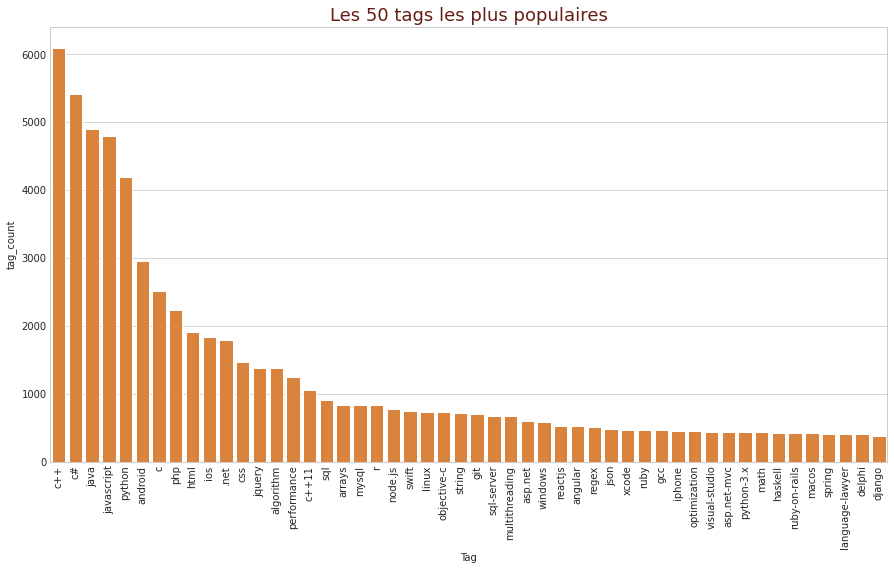

In [ ]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=tags_list.iloc[0:50, :],
            x=tags_list.iloc[0:50, :].index,
            y="tag_count", color="#f48023")
plt.xticks(rotation=90)
plt.title("Les 50 tags les plus populaires",
          fontsize=18, color="#641E16")
plt.show()

On pourrait voir l'évolution de ces tags populaires avec le temps

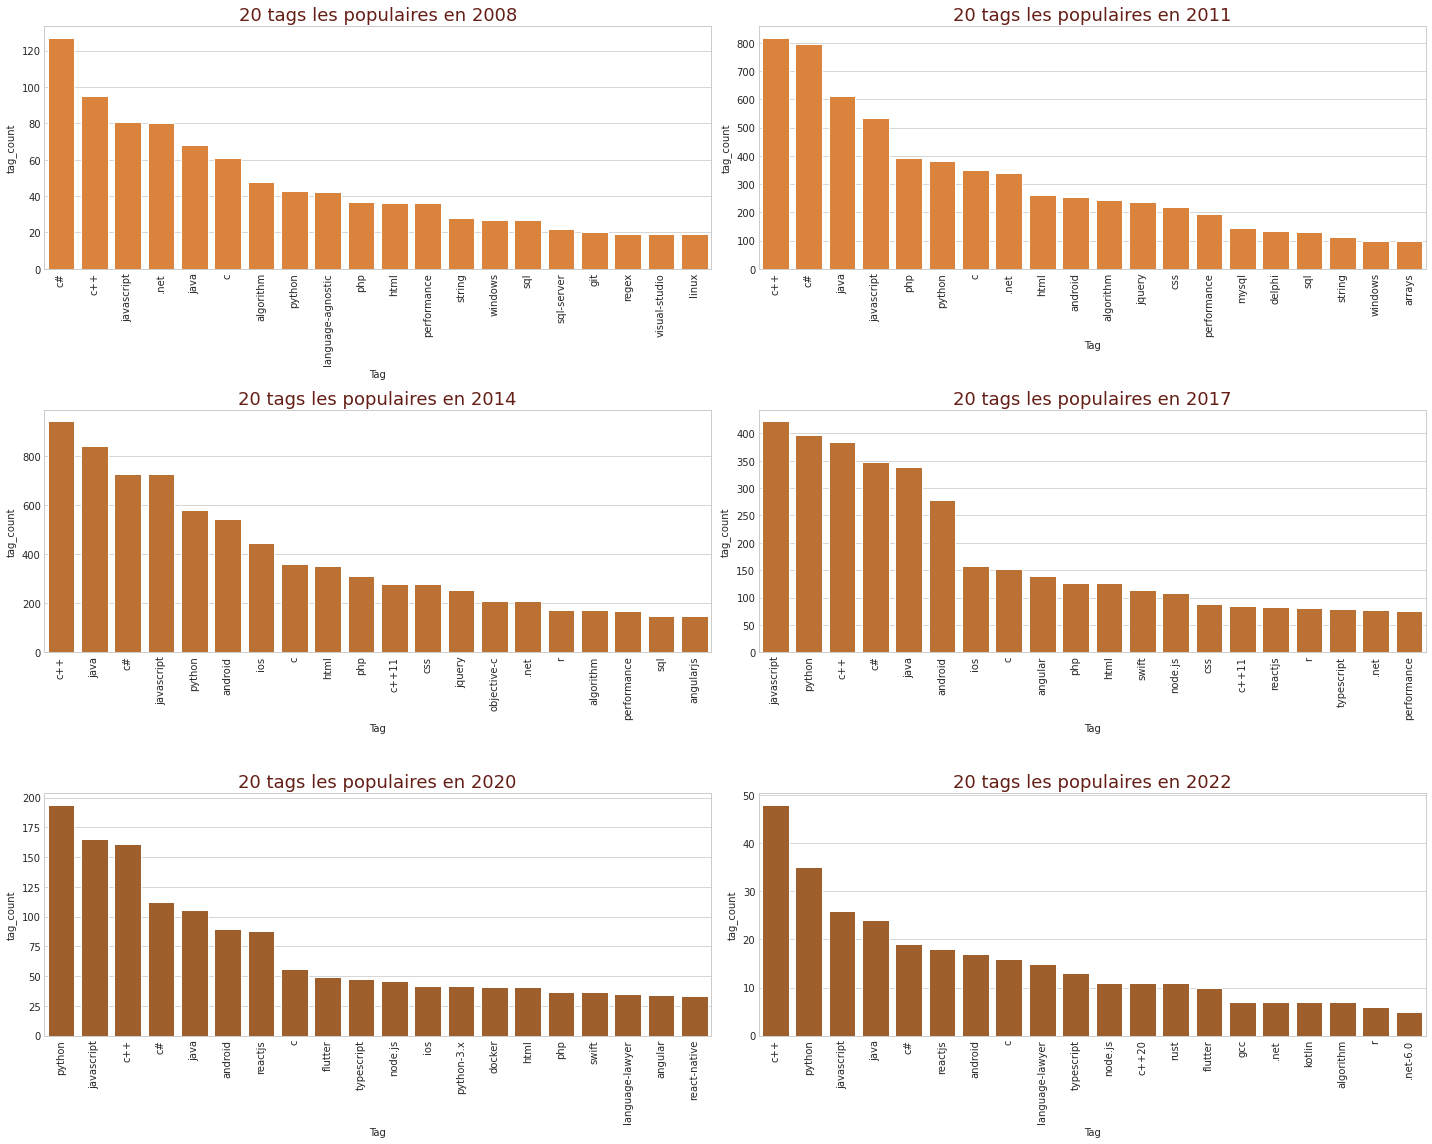

In [ ]:
years = {0: 2008, 1: 2011, 2: 2014, 3: 2017, 4: 2020, 5: 2022}
colors = {0: "#f48023", 
          1: "#f48023",
          2: "#d16e1e",
          3: "#d16e1e",
          4: "#b25d19",
          5: "#b25d19"
          }
subplots = 6
cols = 2
rows = subplots // cols
rows += subplots % cols
position = range(1, subplots + 1)

# Plot popular tags for each year
fig = plt.figure(1, figsize=(20, 16))
for k in range(subplots):
    subset = data[data["CreationDate"].dt.year == years[k]]
    temp_list = count_split_tags(df=subset, column='Tags', separator=',')
    ax = fig.add_subplot(rows, cols, position[k])
    sns.barplot(data=temp_list.iloc[0:20, :],
            x=temp_list.iloc[0:20, :].index,
            y="tag_count", color=colors[k])
    plt.xticks(rotation=90)
    ax.set_title("20 tags les populaires en {}".format(years[k]),
                 fontsize=18, color="#641E16")

fig.tight_layout()
plt.show()

Malgré une petite variation selon les années, on retrouve les principaux languages et framework informatiques dans les premières places.

Analysons le nombre de Tags par question :

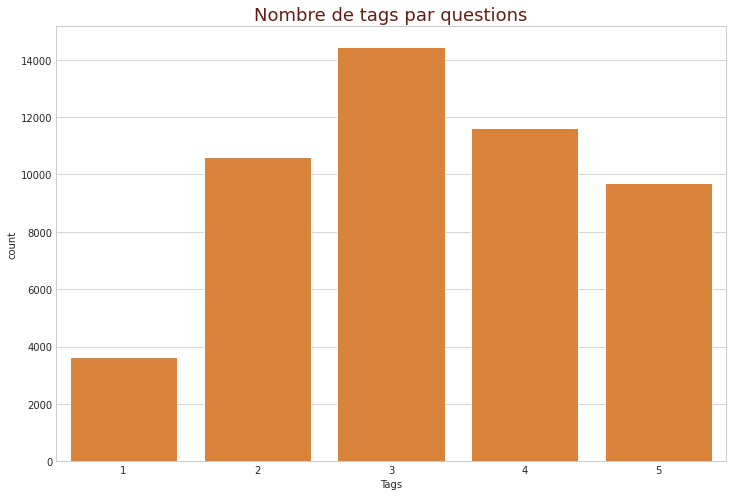

In [ ]:
data['Tags_list'] = data['Tags'].str.split(',')
data['Tags_count'] = data['Tags_list'].parallel_apply(lambda x: len(x))

fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=data.Tags_count, color="#f48023")
ax.set_xlabel("Tags")
plt.title("Nombre de tags par questions",
          fontsize=18, color="#641E16")
plt.show()

La majorité des questions ont 3 tags

In [ ]:
data.head()

,Title,Body,Tags,Score,CommentCount,CreationDate,ViewCount,FavoriteCount,AnswerCount,Tags_list,Tags_count
Id,,,,,,,,,,,
21434218,Masonry & LazyLoad doesn't want to work together,<p>I am setting up a site for a photographer. ...,"javascript,jquery,css,jquery-masonry,jquery-la...",13,6,2014-01-29 14:37:19,9485,0,4,"[javascript, jquery, css, jquery-masonry, jque...",5
18646874,Force a compile time error if std::move will r...,"<p>In his GoingNative 2013 talk, Scott Meyers ...","c++,c++11,move-semantics",23,6,2013-09-05 22:21:32,2165,0,3,"[c++, c++11, move-semantics]",3
26458,IDE for Swing applications development,<p>Is there any IDE that simplifies creating S...,"java,swing,ide",47,6,2008-08-25 17:27:19,33238,0,31,"[java, swing, ide]",3
18647298,Scipy - Sparse Library ImportError: DLL load f...,<p>I have recently been moving my programming ...,"python,scipy,x86-64,importerror",8,6,2013-09-05 23:02:07,10764,0,1,"[python, scipy, x86-64, importerror]",4
27492,C++ Memory management,<p>I've learned in College that you always hav...,"c++,memory,pointers",8,6,2008-08-26 06:50:32,6587,0,8,"[c++, memory, pointers]",3


Vérifions la correlation entre le nombre de tag et les autres variables quantitatives

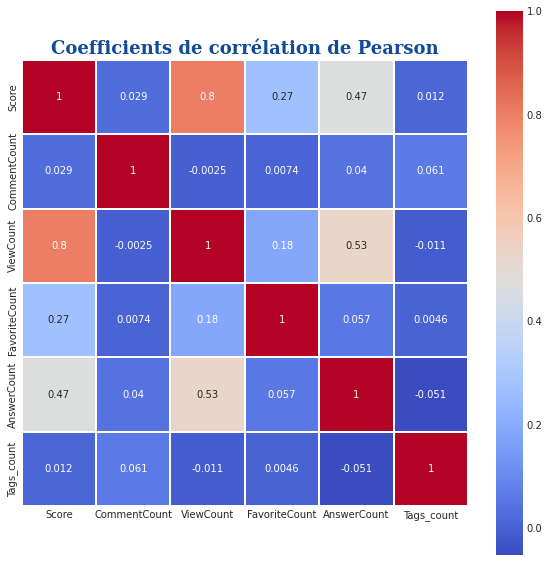

In [ ]:
font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }
corr_mat = data.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson", fontdict=font_title)
plt.show()

Nous constatons une très faible correlation entre le nombre de tags et les autres variables quantitatives.

Nous allons maintenant considérer la question du filtrage du jeu de données en se basant sur les 50 meilleurs tags, histoire de réduire la taille du dataset et ne pas mettre à rude épreuve notre modèle.

In [ ]:
def filter_tag(x, top_list):
    temp_list = []
    for item in x:
        if (item in top_list):
            temp_list.append(item)
    return temp_list

In [ ]:
top_tags = list(tags_list.iloc[0:50].index)
data['Tags_list'] = data['Tags_list']\
                    .parallel_apply(lambda x: filter_tag(x, top_tags))
data['number_of_tags'] = data['Tags_list'].parallel_apply(lambda x : len(x))
data = data[data.number_of_tags > 0]
print("Le nouveau dataset contient {} questions.".format(data.shape[0]))

Le nouveau dataset contient 43392 questions.


**Analyse des titres et des questions**

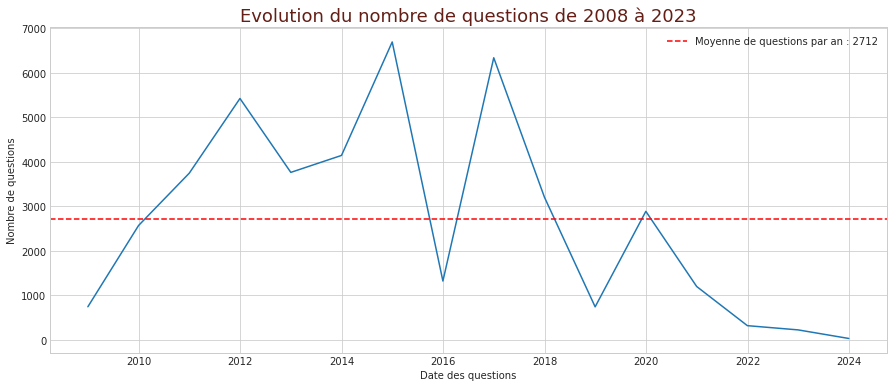

In [ ]:
# Grouper le nombre de post par année
post_year = data.groupby(pd.Grouper(key='CreationDate',
                                    freq='1Y')).agg({'Title': 'count'})

# Graphe evolution
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=post_year, x=post_year.index, y='Title')
plt.axhline(post_year.Title.mean(), 
            color="r", linestyle='--',
            label="Moyenne de questions par an : {:04d}"\
                   .format(int(post_year.Title.mean())))
plt.xlabel("Date des questions")
plt.ylabel("Nombre de questions")
plt.title("Evolution du nombre de questions de 2008 à 2023",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()

On remarque une oscillation de l'évolution avec une baisse constante depuis 2020

Vue que nous allons appliquer le NLP, il serait judicieux de ne pas avoir des titres (Title) et les corps de texte des questions (Body) trop longs en terme de nombre de caractères.

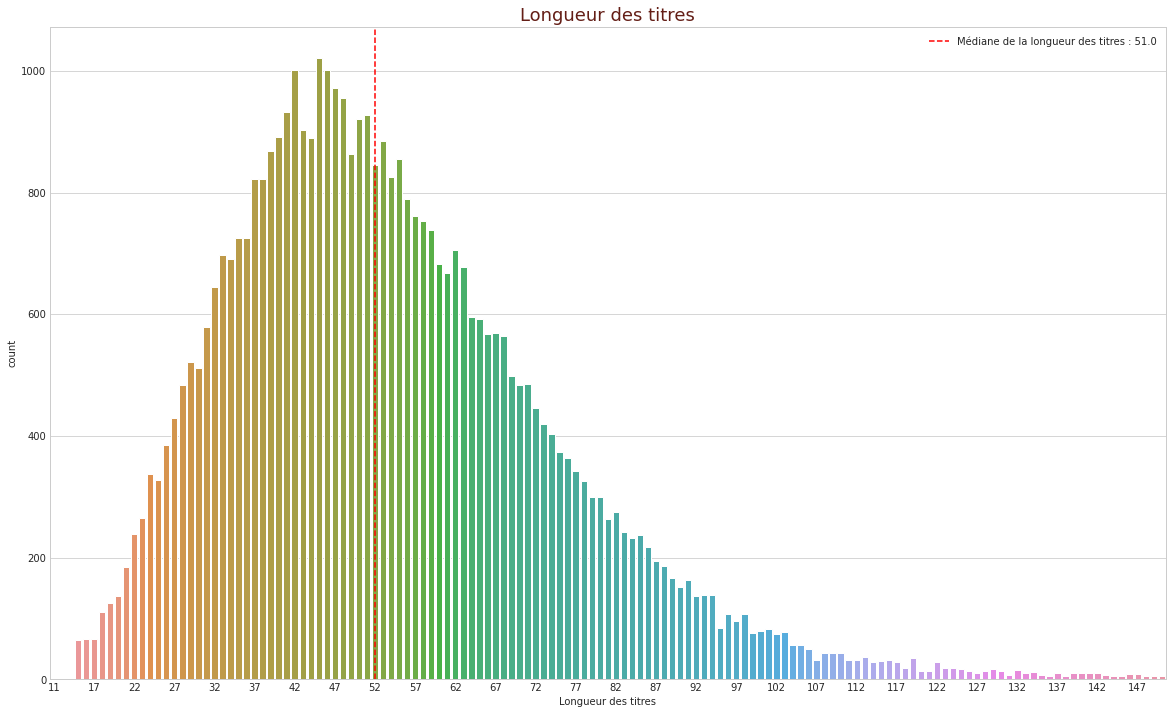

In [ ]:
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=data.Title.str.len())
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 5))
plt.axvline(data.Title.str.len().median() - data.Title.str.len().min(),
            color="r", linestyle='--',
            label="Médiane de la longueur des titres : "+str(data.Title.str.len().median()))
ax.set_xlabel("Longueur des titres")
plt.title("Longueur des titres",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()

In [ ]:
df = data.Body.str.len()
df.head()

Id
21434218    3522
18646874    2705
26458        121
18647298    2254
27492        364
Name: Body, dtype: int64

Etant donné qu'on a une large étendue quasi continue des valeurs de longueur des questions ce qui pourrait résulté d'un graphe aplati, nous allons donc discretiser les valeurs avant de faire le graphe

In [ ]:
X = pd.DataFrame(data.Body.str.len())

discretizer = KBinsDiscretizer(n_bins=200,
                               encode='ordinal',
                               strategy='uniform')
body_lenght = discretizer.fit_transform(X)
body_lenght = discretizer.inverse_transform(body_lenght)
body_lenght = pd.Series(body_lenght.reshape(-1))

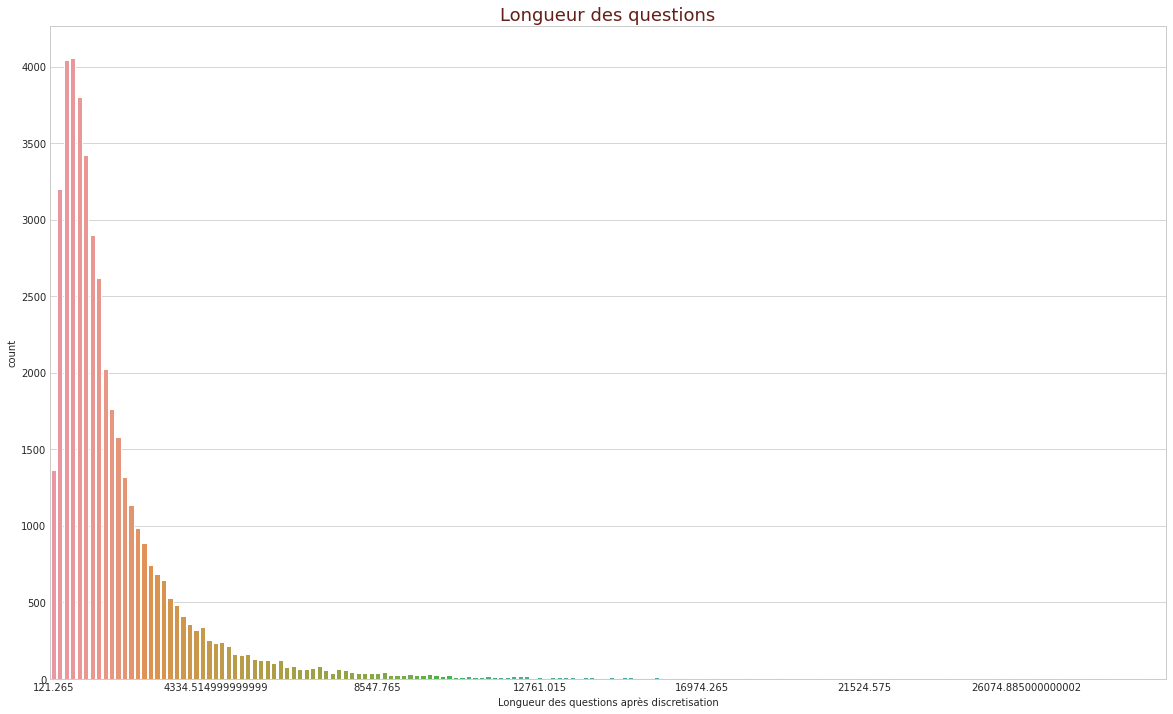

In [ ]:
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=body_lenght)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 25))
ax.set_xlabel("Longueur des questions après discretisation")
plt.title("Longueur des questions",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()

Que ce soit pour les titres ou les questions, nous avons des longueurs raisonnables qui ne mettrons pas à mal nos algorithmes de NLP

**Nettoyage des questions**

In [ ]:
data.head()

,Title,Body,Tags,Score,CommentCount,CreationDate,ViewCount,FavoriteCount,AnswerCount,Tags_list,Tags_count,number_of_tags
Id,,,,,,,,,,,,
21434218,Masonry & LazyLoad doesn't want to work together,<p>I am setting up a site for a photographer. ...,"javascript,jquery,css,jquery-masonry,jquery-la...",13,6,2014-01-29 14:37:19,9485,0,4,"[javascript, jquery, css]",5,3
18646874,Force a compile time error if std::move will r...,"<p>In his GoingNative 2013 talk, Scott Meyers ...","c++,c++11,move-semantics",23,6,2013-09-05 22:21:32,2165,0,3,"[c++, c++11]",3,2
26458,IDE for Swing applications development,<p>Is there any IDE that simplifies creating S...,"java,swing,ide",47,6,2008-08-25 17:27:19,33238,0,31,[java],3,1
18647298,Scipy - Sparse Library ImportError: DLL load f...,<p>I have recently been moving my programming ...,"python,scipy,x86-64,importerror",8,6,2013-09-05 23:02:07,10764,0,1,[python],4,1
27492,C++ Memory management,<p>I've learned in College that you always hav...,"c++,memory,pointers",8,6,2008-08-26 06:50:32,6587,0,8,[c++],3,1


In [ ]:
data.tail()

,Title,Body,Tags,Score,CommentCount,CreationDate,ViewCount,FavoriteCount,AnswerCount,Tags_list,Tags_count,number_of_tags
Id,,,,,,,,,,,,
46195559,Why does componentDidUpdate() create an infini...,<p>I've stored <code>url</code> and a <code>to...,"javascript,reactjs,ecmascript-6",14,9,2017-09-13 10:49:55,28721,0,1,"[javascript, reactjs]",3,2
13263277,Difference between std::system_clock and std::...,<p>What is the difference between <code>std::s...,"c++,c++11,timer,c++-chrono",110,6,2012-11-07 04:48:41,59447,0,5,"[c++, c++11]",4,2
46195465,With C++17 is it possible to detect if a struc...,<p>I need a type trait which will be true if t...,"c++,inheritance,c++17,typetraits",36,9,2017-09-13 10:45:51,3275,0,2,[c++],4,1
28105661,How to remove only certain substrings from a s...,"<p>Using C#, I have a string that is a SQL scr...","c#,regex,string",21,15,2015-01-23 08:18:30,14580,0,5,"[c#, regex, string]",3,3
11117950,Removing White Spacing Between Images in a Table,<p>I know this has been covered before but the...,html,14,10,2012-06-20 10:49:59,38187,0,7,[html],1,1


Le texte contenu dans les questions est souvent au format html, soit entre les balises "`<p></p>`" ou "`<code></code>`". Nous allons utiliser beautifulsoup pour supprimer ces balises. Nous allons avant tout supprimer le code compris dans les questions.

In [ ]:
def remove_code(x):
    soup = BeautifulSoup(x,"lxml")
    code_to_remove = soup.findAll("code")
    for code in code_to_remove:
        code.replace_with(" ")
    return str(soup)

In [ ]:
# Supprimer <code> 
data['Body'] = data['Body'].parallel_apply(remove_code)
# Supprimer toutes les balises
data['Body'] = [BeautifulSoup(text,"lxml").get_text() for text in data['Body']]

In [ ]:
print(data['Body'].head())

Id
21434218    I am setting up a site for a photographer. It ...
18646874    In his GoingNative 2013 talk, Scott Meyers poi...
26458       Is there any IDE that simplifies creating Swin...
18647298    I have recently been moving my programming to ...
27492       I've learned in College that you always have t...
Name: Body, dtype: object


In [ ]:
print(data['Body'].tail())

Id
46195559    I've stored   and a   in   in   component. I'm...
13263277    What is the difference between   and  ? (An ex...
46195465    I need a type trait which will be true if the ...
28105661    Using C#, I have a string that is a SQL script...
11117950    I know this has been covered before but the so...
Name: Body, dtype: object


Nous allons à présent vérifier les différentes langues dans lesquelles sont rédigées les questions

In [ ]:
def detect_lang(x):
    try:
        return detect(x)
    except:
        pass

In [ ]:
data['short_body'] = data['Body'].parallel_apply(lambda x: x[0:100])
data['lang'] = data.short_body.parallel_apply(detect_lang)

In [ ]:
pd.DataFrame(data.lang.value_counts())

,lang
en,43332
fr,9
da,8
no,7
it,5
ca,5
af,4
nl,3
sv,2
es,2


L'anglais étant largement la langue la plus utilisée pour poser des questions, nous ne conserverons que les questions posées dans cette langue

In [ ]:
data = data[data['lang']=='en']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43332 entries, 21434218 to 11117950
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Title           43332 non-null  object        
 1   Body            43332 non-null  object        
 2   Tags            43332 non-null  object        
 3   Score           43332 non-null  int64         
 4   CommentCount    43332 non-null  int64         
 5   CreationDate    43332 non-null  datetime64[ns]
 6   ViewCount       43332 non-null  int64         
 7   FavoriteCount   43332 non-null  int64         
 8   AnswerCount     43332 non-null  int64         
 9   Tags_list       43332 non-null  object        
 10  Tags_count      43332 non-null  int64         
 11  number_of_tags  43332 non-null  int64         
 12  short_body      43332 non-null  object        
 13  lang            43332 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(6)
me

In [ ]:
data.head()

,Title,Body,Tags,Score,CommentCount,CreationDate,ViewCount,FavoriteCount,AnswerCount,Tags_list,Tags_count,number_of_tags,short_body,lang
Id,,,,,,,,,,,,,,
21434218,Masonry & LazyLoad doesn't want to work together,I am setting up a site for a photographer. It ...,"javascript,jquery,css,jquery-masonry,jquery-la...",13,6,2014-01-29 14:37:19,9485,0,4,"[javascript, jquery, css]",5,3,I am setting up a site for a photographer. It ...,en
18646874,Force a compile time error if std::move will r...,"In his GoingNative 2013 talk, Scott Meyers poi...","c++,c++11,move-semantics",23,6,2013-09-05 22:21:32,2165,0,3,"[c++, c++11]",3,2,"In his GoingNative 2013 talk, Scott Meyers poi...",en
26458,IDE for Swing applications development,Is there any IDE that simplifies creating Swin...,"java,swing,ide",47,6,2008-08-25 17:27:19,33238,0,31,[java],3,1,Is there any IDE that simplifies creating Swin...,en
18647298,Scipy - Sparse Library ImportError: DLL load f...,I have recently been moving my programming to ...,"python,scipy,x86-64,importerror",8,6,2013-09-05 23:02:07,10764,0,1,[python],4,1,I have recently been moving my programming to ...,en
27492,C++ Memory management,I've learned in College that you always have t...,"c++,memory,pointers",8,6,2008-08-26 06:50:32,6587,0,8,[c++],3,1,I've learned in College that you always have t...,en


**Feature engineering**

Nous allons à présent réaliser plusieurs opérations de Text cleaning pour que les données soient exploitables par les algorithmes de NLP :

* Supprimer tous les mots autres que les noms
* Mettre tout le texte en minuscules
* Supprimer les caractères Unicode
* Supprimer les espaces supplémentaires
* Supprimer la ponctuation
* Supprimer les liens
* Supprimer les nombres
* Supprimer les stopwords
* Faire la lemmatisation  

Nous allons ensuite créer de nouvelles variables sur la base des questions et des titres nettoyés.

In [ ]:
def remove_pos(nlp, x, pos_list):
    doc = nlp(x)
    list_text_row = []
    for token in doc:
        if(token.pos_ in pos_list):
            list_text_row.append(token.text)
    join_text_row = " ".join(list_text_row)
    join_text_row = join_text_row.lower().replace("c #", "c#")
    return join_text_row

In [ ]:
def text_cleaner(x, nlp, pos_list, lang="english"):
    # Remove POS not in "NOUN", "PROPN"
    x = remove_pos(nlp, x, pos_list)
    # Case normalization
    x = x.lower()
    # Remove unicode characters
    x = x.encode("ascii", "ignore").decode()
    # Remove English contractions
    x = re.sub("\'\w+", '', x)
    # Remove ponctuation but not # (for C# for example)
    x = re.sub('[^\\w\\s#++]', '', x)
    # Remove links
    x = re.sub(r'http*\S+', '', x)
    # Remove numbers
    x = re.sub(r'\w*\d+\w*', '', x)
    # Remove extra spaces
    x = re.sub('\s+', ' ', x)
        
    # Tokenization
    x = nltk.tokenize.word_tokenize(x)
    
    # List of stop words in select language from NLTK
    stop_words = stopwords.words(lang)
    # Remove stop words
    x = [word for word in x if word not in stop_words 
         and len(word)>0]
    # Lemmatizer
    wn = nltk.WordNetLemmatizer()
    x = [wn.lemmatize(word) for word in x]

    mwtokenizer = nltk.tokenize.MWETokenizer(separator='')
    mwtokenizer.add_mwe(('c', '#'))
    x = mwtokenizer.tokenize(x)
    
    # Return cleaned text
    return x

**Nettoyage des corps de texte**

In [ ]:
nlp = spacy.load('en_core_web_lg') #, exclude=['tok2vec', 'ner', 'parser', 'attribute_ruler', 'lemmatizer']
pos_list = ["NOUN","PROPN"]

data['Body_cleaned'] = data.Body\
                            .parallel_apply(lambda x: 
                                            text_cleaner(x,
                                                         nlp,
                                                         pos_list,
                                                         "english"))
print(data['Body_cleaned'].head(3))

Id
21434218    [site, photographer, bootstrap, framework, mas...
18646874    [goingnative, talk, scott, meyers, guarantee, ...
26458         [ide, swing, application, line, visual, studio]
Name: Body_cleaned, dtype: object


In [ ]:
print(data['Body'].iloc[4])

I've learned in College that you always have to free your unused Objects but not how you actually do it. For example structuring your code right and so on. 
Are there any general rules on how to handle pointers in C++? 
I'm currently not allowed to use boost. I have to stick to pure c++ because the framework I'm using forbids any use of generics.



In [ ]:
print(data['Body_cleaned'].iloc[4])

['college', 'object', 'example', 'code', 'rule', 'pointer', 'c++', 'boost', 'c++', 'framework', 'use', 'generic']


In [ ]:
print(data['Body'].iloc[-2])

Using C#, I have a string that is a SQL script containing multiple queries. I want to remove sections of the string that are enclosed in single quotes. I can do this using  , in this manner:
 
Results in: "Only  can we turn him to the  of the Force"
What I want to do is remove the substrings between quotes EXCEPT for substrings containing a specific substring. For example, using the string above, I want to remove the quoted substrings except for those that contain "dark," such that the resulting string is:
Results in: "Only  can we turn him to the 'dark side' of the Force"
How can this be accomplished using  , or perhaps by some other technique? I'm currently trying a solution that involves using  ,  , and  . 
Note: I don't care if the single quotes around "dark side" are removed or not, so the result could also be: "Only can we turn him to the dark side of the Force." I say this because a solution using   would remove all the single quotes.
Edit: I don't have a solution yet using  ,  

In [ ]:
print(data['Body_cleaned'].iloc[-2])

['c#', 'string', 'sql', 'script', 'query', 'section', 'string', 'quote', 'manner', 'force', 'substring', 'quote', 'except', 'substring', 'substring', 'example', 'string', 'substring', 'string', 'result', 'side', 'force', 'technique', 'solution', 'quote', 'side', 'result', 'side', 'force', 'solution', 'quote', 'edit', 'solution', 'head', 'code', 'thanks', 'edit', 'vks', 'solution', 'work', 'attempt', 'quote', 'string']


In [ ]:
data.head()

,Title,Body,Tags,Score,CommentCount,CreationDate,ViewCount,FavoriteCount,AnswerCount,Tags_list,Tags_count,number_of_tags,short_body,lang,Body_cleaned
Id,,,,,,,,,,,,,,,
21434218,Masonry & LazyLoad doesn't want to work together,I am setting up a site for a photographer. It ...,"javascript,jquery,css,jquery-masonry,jquery-la...",13,6,2014-01-29 14:37:19,9485,0,4,"[javascript, jquery, css]",5,3,I am setting up a site for a photographer. It ...,en,"[site, photographer, bootstrap, framework, mas..."
18646874,Force a compile time error if std::move will r...,"In his GoingNative 2013 talk, Scott Meyers poi...","c++,c++11,move-semantics",23,6,2013-09-05 22:21:32,2165,0,3,"[c++, c++11]",3,2,"In his GoingNative 2013 talk, Scott Meyers poi...",en,"[goingnative, talk, scott, meyers, guarantee, ..."
26458,IDE for Swing applications development,Is there any IDE that simplifies creating Swin...,"java,swing,ide",47,6,2008-08-25 17:27:19,33238,0,31,[java],3,1,Is there any IDE that simplifies creating Swin...,en,"[ide, swing, application, line, visual, studio]"
18647298,Scipy - Sparse Library ImportError: DLL load f...,I have recently been moving my programming to ...,"python,scipy,x86-64,importerror",8,6,2013-09-05 23:02:07,10764,0,1,[python],4,1,I have recently been moving my programming to ...,en,"[programming, bit, window, machine, library, i..."
27492,C++ Memory management,I've learned in College that you always have t...,"c++,memory,pointers",8,6,2008-08-26 06:50:32,6587,0,8,[c++],3,1,I've learned in College that you always have t...,en,"[college, object, example, code, rule, pointer..."


In [ ]:
full_corpus = []
for i in data['Body_cleaned']:
    full_corpus.extend(i)

In [ ]:
body_dist = nltk.FreqDist(full_corpus)
body_dist = pd.DataFrame(body_dist.most_common(2000),
                         columns=['Word', 'Frequency'])

In [ ]:
body_dist.head()

,Word,Frequency
0,code,28077
1,file,17559
2,error,15099
3,way,15027
4,problem,13832


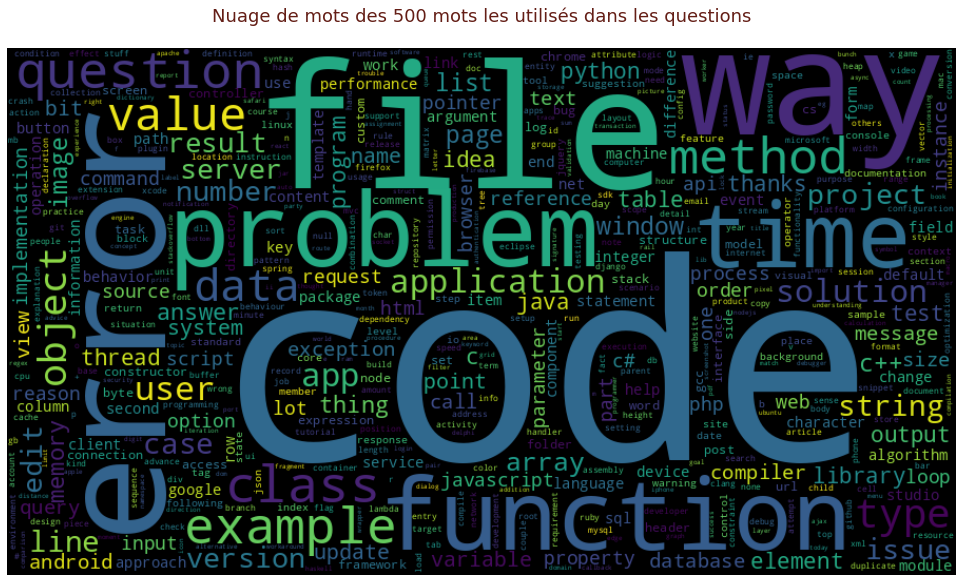

In [ ]:
fig = plt.figure(1, figsize=(17, 12))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=900, height=500,
                      background_color="black",
                      max_words=500, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(body_dist.set_index('Word').to_dict()['Frequency'])

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title("Nuage de mots des 500 mots les utilisés dans les questions\n",
          fontsize=18, color="#641E16")
plt.show()

**Nettoyage des titres**

In [ ]:
nlp = spacy.load('en_core_web_lg') # , exclude=['tok2vec', 'ner', 'parser', 'attribute_ruler', 'lemmatizer']
pos_list = ["NOUN","PROPN"]

data['Title_cleaned'] = data.Title\
                            .parallel_apply(lambda x: 
                                            text_cleaner(x,
                                                         nlp,
                                                         pos_list,
                                                         "english"))
print(data['Title_cleaned'].head(3))

Id
21434218                             [masonry, lazyload]
18646874    [force, compile, time, error, stdmove, copy]
26458             [ide, swing, application, development]
Name: Title_cleaned, dtype: object


In [ ]:
full_corpus_t = []
for i in data['Title_cleaned']:
    full_corpus_t.extend(i)

In [ ]:
title_dist = nltk.FreqDist(full_corpus_t)
title_dist = pd.DataFrame(title_dist.most_common(500),
                          columns=['Word', 'Frequency'])

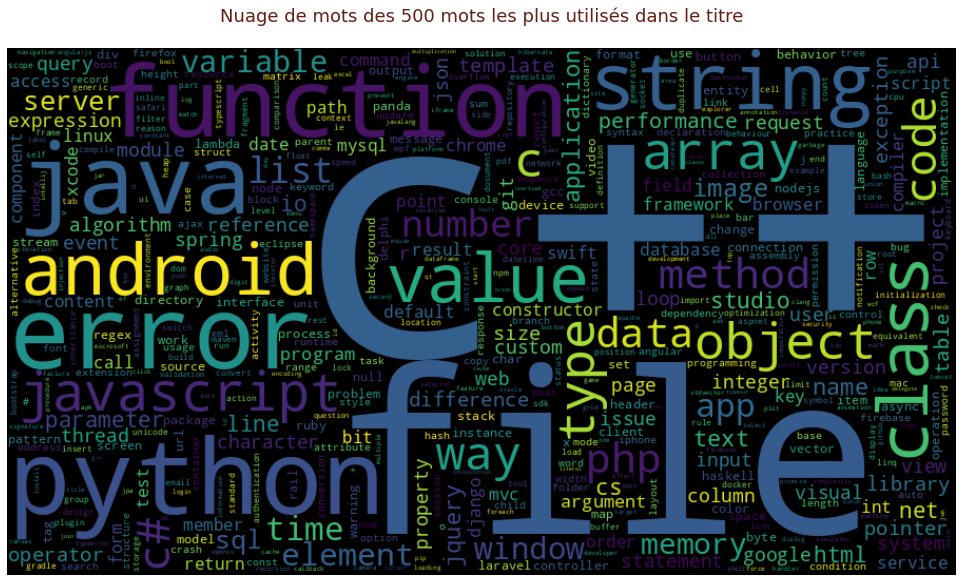

In [ ]:
fig = plt.figure(1, figsize=(17, 12))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=900, height=500,
                      background_color="black",
                      max_words=500, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(title_dist.set_index('Word').to_dict()['Frequency'])

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title("Nuage de mots des 500 mots les plus utilisés dans le titre\n",
          fontsize=18, color="#641E16")
plt.show()

**Export du dataset**

In [ ]:
data = data[['Title_cleaned',
             'Body_cleaned',
             'Score',
             'Tags_list']]
# Rename columns
data = data.rename(columns={'Title_cleaned': 'Title',
                            'Body_cleaned': 'Body',
                            'Tags_list': 'Tags'})
data.head(3)

,Title,Body,Score,Tags
Id,,,,
21434218,"[masonry, lazyload]","[site, photographer, bootstrap, framework, mas...",13,"[javascript, jquery, css]"
18646874,"[force, compile, time, error, stdmove, copy]","[goingnative, talk, scott, meyers, guarantee, ...",23,"[c++, c++11]"
26458,"[ide, swing, application, development]","[ide, swing, application, line, visual, studio]",47,[java]


In [ ]:
# Export to CSV
data.to_csv('stackoverflow-clean-data.csv', sep=';')